# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [1]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())

#Unite iris.data with iris.targe and shuffle them
#------
iris_data_with_target = np.append(iris.data, iris.target.reshape([iris.target.shape[0], 1]), axis=1)
np.random.shuffle(iris_data_with_target) 

X = iris_data_with_target[:, 0:4]
y = iris_data_with_target[:, 4]
#------

labels, feature_names  = iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,6.6,2.9,4.6,1.3,1.0,versicolor
1,7.7,2.6,6.9,2.3,2.0,virginica
2,6.3,2.5,5.0,1.9,2.0,virginica
3,6.1,2.8,4.0,1.3,1.0,versicolor
4,5.7,2.8,4.1,1.3,1.0,versicolor
...,...,...,...,...,...,...
145,7.4,2.8,6.1,1.9,2.0,virginica
146,5.4,3.7,1.5,0.2,0.0,setosa
147,6.7,3.1,4.7,1.5,1.0,versicolor
148,7.1,3.0,5.9,2.1,2.0,virginica


In [2]:
#Normalizing iris.data using StandardScaler
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X_norm = stdScaler.fit_transform(X)

X_norm

array([[ 9.16836886e-01, -3.62176246e-01,  4.78571135e-01,
         1.32509732e-01],
       [ 2.24968346e+00, -1.05276654e+00,  1.78583195e+00,
         1.44883158e+00],
       [ 5.53333275e-01, -1.28296331e+00,  7.05920842e-01,
         9.22302838e-01],
       [ 3.10997534e-01, -5.92373012e-01,  1.37546573e-01,
         1.32509732e-01],
       [-1.73673948e-01, -5.92373012e-01,  1.94384000e-01,
         1.32509732e-01],
       [-4.16009689e-01, -1.28296331e+00,  1.37546573e-01,
         1.32509732e-01],
       [-4.16009689e-01, -1.74335684e+00,  1.37546573e-01,
         1.32509732e-01],
       [ 5.53333275e-01, -5.92373012e-01,  7.62758269e-01,
         3.95774101e-01],
       [ 1.28034050e+00,  9.82172869e-02,  7.62758269e-01,
         1.44883158e+00],
       [ 5.53333275e-01,  7.88807586e-01,  1.04694540e+00,
         1.58046376e+00],
       [ 1.89829664e-01, -1.97355361e+00,  7.05920842e-01,
         3.95774101e-01],
       [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
      

In [3]:
k_best = 0 # 'compute the best k'
score_best = float(0) #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0.0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7, test_size=0.3)
print(f'X Train shape {X_train.shape}')
print(f'X Test shape {X_test.shape}')
print(f'Y Train shape {y_train.shape}')
print(f'Y Test shape {y_test.shape}')

X Train shape (105, 4)
X Test shape (45, 4)
Y Train shape (105,)
Y Test shape (45,)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_max = 100

for K in range(1, k_max + 1): 
    knn_c = KNeighborsClassifier(K) 
    knn_c.fit(X_train, y_train) 

    y_pred = knn_c.predict(X_test) 

    current_accuracy = float(metrics.accuracy_score(y_test, y_pred)) 
    if current_accuracy > score_best:
        k_best = K
        score_best = current_accuracy

print(f'Best K: {k_best}, best accuracy: {score_best}')

Best K: 9, best accuracy: 0.9555555555555556


## Synthetic dataset  

<IPython.core.display.Javascript object>


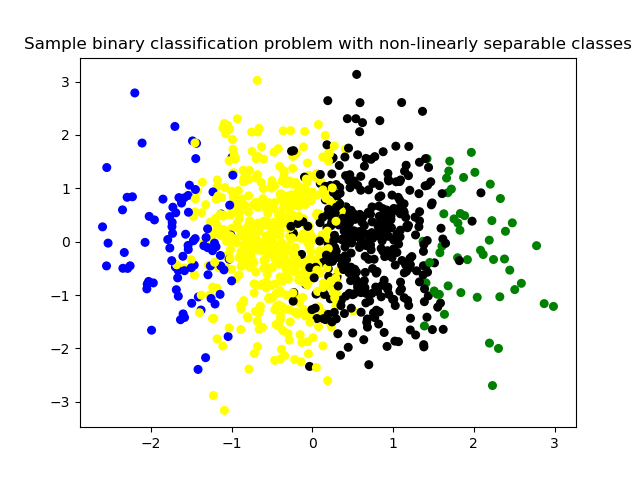

In [6]:
from sklearn.datasets import make_blobs, make_regression
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_regression(n_samples = 1000, n_features = 4, random_state = 4,\
                                            bias=1.2,n_informative=1, noise=10)
y_D2 = y_D2 
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)




In [7]:
k_best = 0 # 'compute the best k'
score_best = 0 #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0


In [8]:
#Normalizarion
from sklearn.preprocessing import MinMaxScaler

M_N_scaler = MinMaxScaler()
X_D2_norm = M_N_scaler.fit_transform(X_D2)
X_D2_norm

array([[0.3519594 , 0.37479006, 0.23999715, 0.29761285],
       [0.38723623, 0.47463338, 0.38768625, 0.34439744],
       [0.25091401, 0.57113556, 0.49677493, 0.42094351],
       ...,
       [0.75684348, 0.58508452, 0.35192933, 0.5881364 ],
       [0.59739928, 0.34814103, 0.38326387, 0.5994686 ],
       [0.37460328, 0.6619855 , 0.3527201 , 0.75708094]])

In [9]:
from sklearn.model_selection import train_test_split

X_train_D2, X_test_D2, y_train_D2, y_test_D2 = train_test_split(X_D2_norm, y_D2, train_size=0.7, test_size=0.3)

print(f'X_D2 Train shape {X_train_D2.shape}')
print(f'X_D2 Test shape {X_test_D2.shape}')
print(f'y_D2 Train shape {y_train_D2.shape}')
print(f'y_D2 Test shape {y_test_D2.shape}')

X_D2 Train shape (700, 4)
X_D2 Test shape (300, 4)
y_D2 Train shape (700,)
y_D2 Test shape (300,)


In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_max_value = 100

Ks =[]
scores = []
mres = []
current_mre = 0
for K in range(1, k_max_value + 1): 
    knn_r = KNeighborsRegressor(K) 
    knn_r.fit(X_train_D2, y_train_D2)

    y_pred_D2 = knn_r.predict(X_test_D2)

    current_mre = mean_squared_error(y_test_D2, y_pred_D2)
    score = knn_r.score(X_test_D2, y_test_D2)
    Ks.append(K)
    scores.append(score)
    mres.append(current_mre)

    if score >  score_best :
        k_best = K
        score_best = score

print(f"Best K is {k_best} and it`s mre equals {current_mre}, score {score_best}")

Best K is 6 and it`s mre equals 440.96954659527694, score 0.9172181447948176


<IPython.core.display.Javascript object>


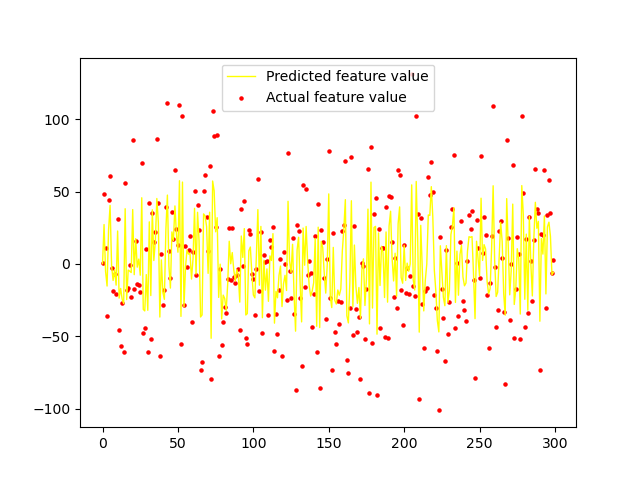

In [18]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(range(len(y_test_D2)), y_test_D2, s=5, color="red", label='Actual feature value')
plt.plot(range(len(y_pred_D2)), y_pred_D2, lw=1, color="yellow", label='Predicted feature value')
plt.legend()


<IPython.core.display.Javascript object>


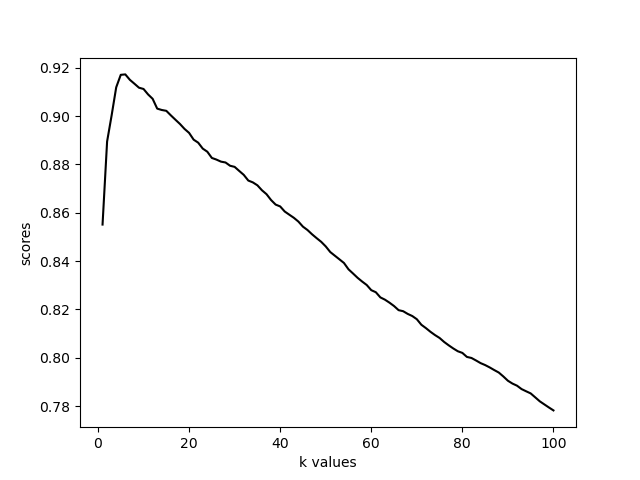

Text(0, 0.5, 'scores')

In [17]:
plt.figure()
plt.plot(Ks, scores, lw = 1.5, color="black")
plt.xlabel("k values")
plt.ylabel("scores")